In [1]:
import sys 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pprint

# ml imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

#pytorch imports
from torchvision import transforms
from torchvision import datasets
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, random_split
from torchvision.transforms import ToTensor

sys.path.append("../")
import cnn_bench
from experimenter import *

In [2]:
#fashion dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
# Extract data and labels from the training set
X_train = training_data.data.numpy()
y_train = training_data.targets.numpy()

# Extract data and labels from the test set
X_test = test_data.data.numpy()
y_test = test_data.targets.numpy()

# Reshape X_train and X_test to be 2D arrays (flatten the 28x28 images)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [4]:
print("X shape: ", X_train.shape)
print("y shape: ", y_train.shape)

X shape:  (60000, 784)
y shape:  (60000,)


# Global Variables

In [5]:
# customize based on training data
dataset_name = "fashionMNIST"
data_sizes = [500, 1000, 5000, 10000, 20000]
datetime = dt.datetime.now().strftime(date_format)
experiment_info = (dataset_name, data_sizes, X_train, y_train, X_test, y_test)
constants = (data_sizes, datetime, dataset_name)
pp = pprint.PrettyPrinter(indent=4)

# Model Training

In [6]:
# RANDOM FOREST
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'randomforest'

rfr_results = benchmark_ml(model_name, experiment_info, datetime)
benchmarking.update(rfr_results)

Benchmarking randomforest: 100%|████████████████| 25/25 [00:52<00:00,  2.09s/it]


In [7]:
# K NEAREST NEIGHBORS
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'knn'

knn_results = benchmark_ml(model_name, experiment_info, datetime)
benchmarking.update(knn_results)

Benchmarking knn: 100%|█████████████████████████| 25/25 [04:21<00:00, 10.47s/it]


In [8]:
# CONVULUTIONAL NEURAL NETWORK
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'cnn'

#Load Data and initialize CNN Model
train_loader, val_loader, test_loader, input_channels = cnn_bench.load_and_prepare_data('fashion-mnist')
model = cnn_bench.CNNModel(input_channels=input_channels, input_size=28)

#Run benchmarking on the CNN model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_results = cnn_bench.run_cnn(model, train_loader, val_loader, test_loader, device, data_sizes, epochs=10, repeat = 5)

#Store CNN Results in the Benchmarking Format
datetime_str = dt.datetime.now().strftime('%y%m%d@%H%M')
for i, size in enumerate(data_sizes):
    # Save mean values
    cnn_bench.save_cnn_data(cnn_results['cnn']['mean']['train_acc'][i], "fashionMNIST", 'cnn', 'acc', i, datetime_str, val=False)
    cnn_bench.save_cnn_data(cnn_results['cnn']['mean']['val_acc'][i], "fashionMNIST", 'cnn', 'acc', i, datetime_str, val=True)
    cnn_bench.save_cnn_data(cnn_results['cnn']['mean']['time'][i], "fashionMNIST", 'cnn', 'time', i, datetime_str)
    
    # Save standard deviation values
    cnn_bench.save_cnn_data(cnn_results['cnn']['std']['train_acc'][i], "fashionMNIST", 'cnn', 'acc_std', i, datetime_str, val=False)
    cnn_bench.save_cnn_data(cnn_results['cnn']['std']['val_acc'][i], "fashionMNIST", 'cnn', 'acc_std', i, datetime_str, val=True)
    cnn_bench.save_cnn_data(cnn_results['cnn']['std']['time'][i], "fashionMNIST", 'cnn', 'time_std', i, datetime_str)


benchmarking.update(cnn_results)

Benchmarking CNN: 100%|█████████████████████████| 25/25 [38:52<00:00, 93.31s/it]

Data saved to results/fashionMNIST/cnn/npy_files/train_acc_i0_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/val_acc_i0_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/train_time_i0_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/train_acc_std_i0_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/val_acc_std_i0_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/train_time_std_i0_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/train_acc_i1_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/val_acc_i1_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/train_time_i1_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/train_acc_std_i1_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/val_acc_std_i1_d240822@1742.npy
Data saved to results/fashionMNIST/cnn/npy_files/train_time_std_i1_d240822@1742.npy
Data saved to results/fashionMNI

In [9]:
# METRIC LEARNING
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'metric'

In [10]:
# OUR MODEL
new_set = False
if new_set:
    datetime = dt.datetime.now().strftime(date_format)
model_name = 'ours'

# our_results = benchmark_ml(model_name, experiment_info, datetime)
# benchmarking.update(our_results)

# Model Evaluation

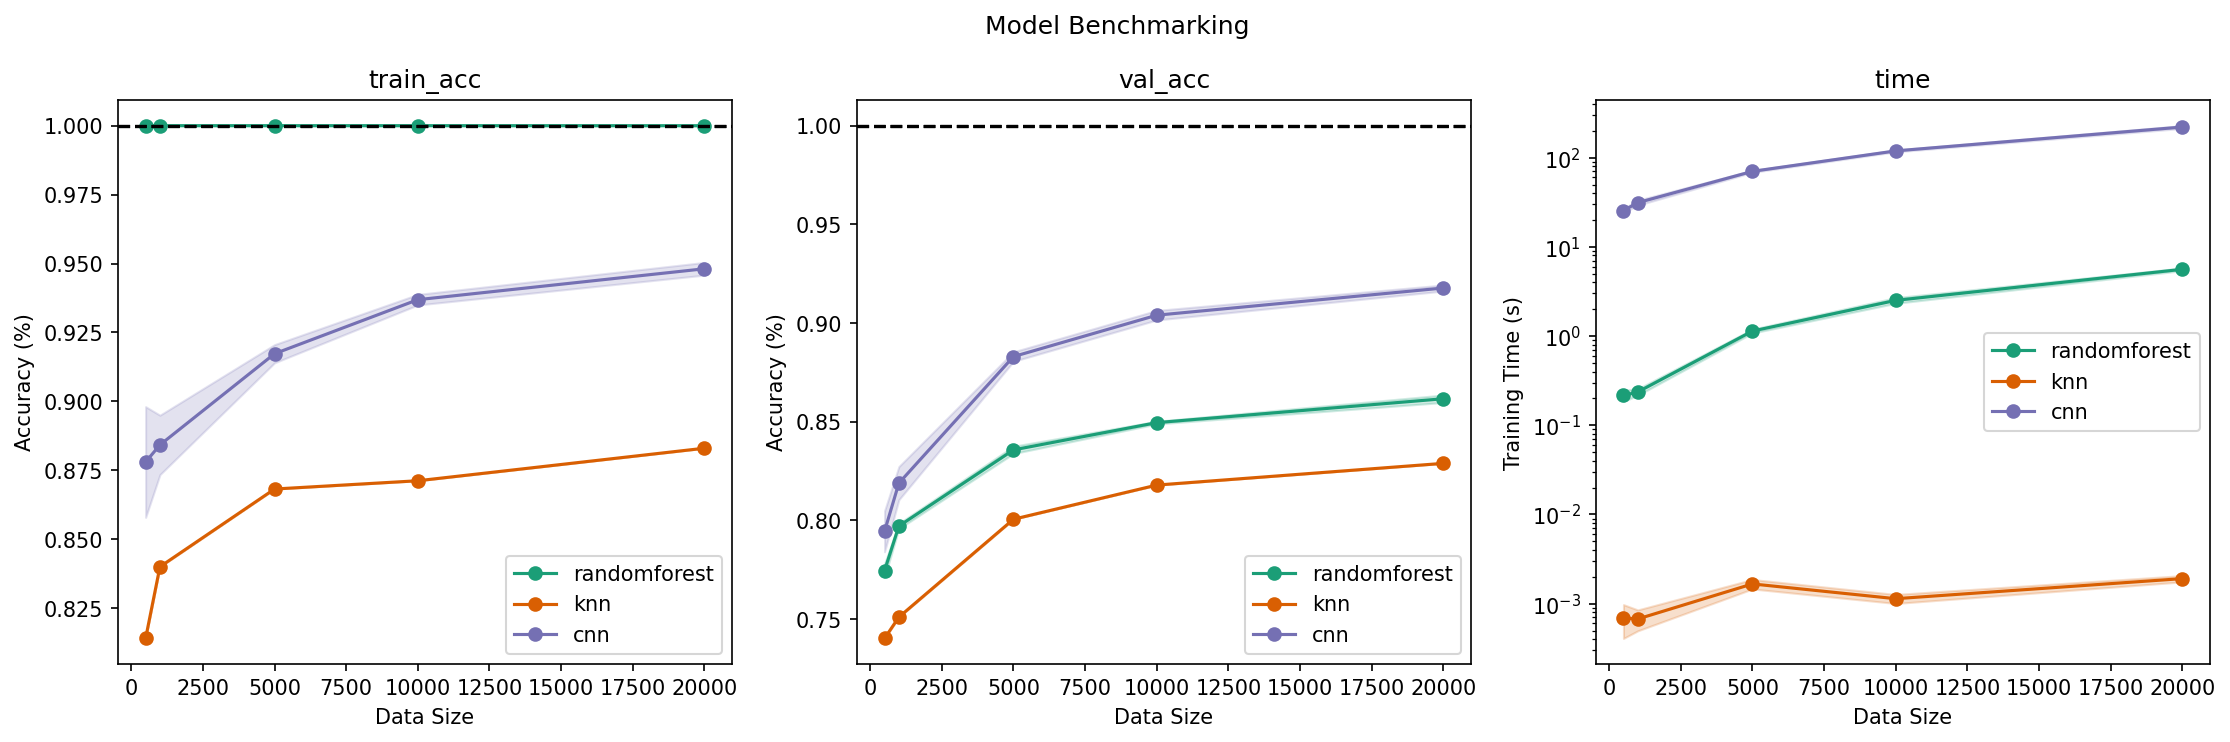

In [11]:
plot_results(benchmarking, constants, 
             save_fig=True, 
             from_data=False)

In [12]:
# pretty print the benchmarking results with package
pp.pprint(benchmarking)

{   'cnn': {   'mean': {   'time': array([ 25.50049202,  31.28675703,  70.18837333, 119.02075086,
       220.50190151]),
                           'train_acc': array([0.878  , 0.8842 , 0.91728, 0.93688, 0.94809]),
                           'val_acc': array([0.79446667, 0.81886667, 0.883     , 0.90396667, 0.91773333])},
               'std': {   'time': array([1.38581455, 2.0245893 , 1.7724808 , 2.90932573, 7.9740887 ]),
                          'train_acc': array([0.02007984, 0.01077775, 0.00329509, 0.00191353, 0.002299  ]),
                          'val_acc': array([0.0103357 , 0.00839934, 0.00241523, 0.00242304, 0.00152607])}},
    'knn': {   0: {   'time': array([0.00125246, 0.00054721, 0.00170133, 0.00114567, 0.00210933]),
                      'train_acc': array([0.814 , 0.84  , 0.8682, 0.8712, 0.883 ]),
                      'val_acc': array([0.7402, 0.751 , 0.8006, 0.8179, 0.8289])},
               1: {   'time': array([0.00058637, 0.00072237, 0.00168104, 0.00095958, 0.00199